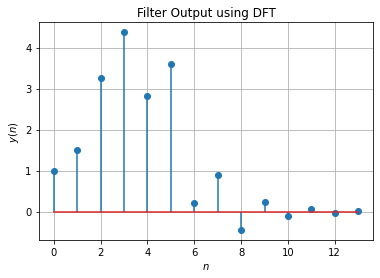

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#If using termux
import subprocess
import shlex
#end if


N = 14
n = np.arange(N)
fn=(-1/2)**n
hn1=np.pad(fn, (0,2), 'constant', constant_values=(0))
hn2=np.pad(fn, (2,0), 'constant', constant_values=(0))
h = hn1+hn2

xtemp=np.array([1.0,2.0,3.0,4.0,2.0,1.0])
x=np.pad(xtemp, (0,8), 'constant', constant_values=(0))

X = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		X[k]+=x[n]*np.exp(-1j*2*np.pi*n*k/N)
H = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		H[k]+=h[n]*np.exp(-1j*2*np.pi*n*k/N)

Y = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	Y[k] = X[k]*H[k]

y = np.zeros(N) + 1j*np.zeros(N)
for k in range(0,N):
	for n in range(0,N):
		y[k]+=Y[n]*np.exp(1j*2*np.pi*n*k/N)

#print(X)
y = np.real(y)/N
#plots
plt.stem(range(0,N),y)
plt.title('Filter Output using DFT')
plt.xlabel('$n$')
plt.ylabel('$y(n)$')
plt.grid()# minor
#
#If using termux
plt.savefig('../figs/yndft.pdf')
#subprocess.run(shlex.split("termux-open ../figs/yndft.pdf"))
#else
#plt.show()